# Imports needed for this notebook

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import IPython
import IPython.display

# To-Do
- Readme.md

# Importing the dataset from UCI website

In [3]:
# fetch dataset
# https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption
individual_household_electric_power_consumption = fetch_ucirepo(id=235)

# data (as pandas dataframes)
df = individual_household_electric_power_consumption.data.features

# metadata
# print(individual_household_electric_power_consumption.metadata)

# variable information
# print(individual_household_electric_power_consumption.variables)


/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


# EDA & Data Cleaning

In [4]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
df.dtypes

,0
Date,object
Time,object
Global_active_power,object
Global_reactive_power,object
Voltage,object
Global_intensity,object
Sub_metering_1,object
Sub_metering_2,object
Sub_metering_3,float64


In [6]:
df = df.dropna(how='any')
df = df.reset_index(drop=True)

In [7]:
df.shape

(2049280, 9)

In [8]:
df['Global_active_power'] = df['Global_active_power'].apply(float)
df['Global_reactive_power'] = df['Global_reactive_power'].apply(float)
df['Voltage'] = df['Voltage'].apply(float)
df['Global_intensity'] = df['Global_intensity'].apply(float)
df['Sub_metering_1'] = df['Sub_metering_1'].apply(float)
df['Sub_metering_2'] = df['Sub_metering_2'].apply(float)
df['Sub_metering_3'] = df['Sub_metering_3'].apply(float)

In [9]:
df['Sub_metering_4'] = round(df['Global_active_power']*1000/60 - df['Sub_metering_1'] - df['Sub_metering_2'] - df['Sub_metering_3'], 1)

In [10]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.3
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.3
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.6
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.8
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.1


In [11]:
df['Datetime'] = df['Date'].astype(str) + ' ' + df['Time'].astype(str)

In [12]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4,Datetime
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.3,16/12/2006 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.3,16/12/2006 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.6,16/12/2006 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.8,16/12/2006 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.1,16/12/2006 17:28:00


In [13]:
df.dtypes

,0
Date,object
Time,object
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Global_intensity,float64
Sub_metering_1,float64
Sub_metering_2,float64
Sub_metering_3,float64
Sub_metering_4,float64


In [14]:
df.columns = ['date', 'time', 'global_active_power_kw', 'global_reactive_power_kw', 'voltage_v', 'global_intensity_a', 'sub_metering_1_wh', 'sub_metering_2_wh', 'sub_metering_3_wh', 'sub_metering_4_wh', 'datetime']

In [15]:
df.head()

,date,time,global_active_power_kw,global_reactive_power_kw,voltage_v,global_intensity_a,sub_metering_1_wh,sub_metering_2_wh,sub_metering_3_wh,sub_metering_4_wh,datetime
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.3,16/12/2006 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.3,16/12/2006 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.6,16/12/2006 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.8,16/12/2006 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.1,16/12/2006 17:28:00


In [16]:
df.iloc[36]

,36
date,16/12/2006
time,18:00:00
global_active_power_kw,2.79
global_reactive_power_kw,0.18
voltage_v,237.52
global_intensity_a,11.8
sub_metering_1_wh,0.0
sub_metering_2_wh,0.0
sub_metering_3_wh,18.0
sub_metering_4_wh,28.5


In [17]:
ten_min_df = df[36::10]

In [18]:
date_time = pd.to_datetime(ten_min_df.pop('datetime'), format='%d/%m/%Y %H:%M:%S')

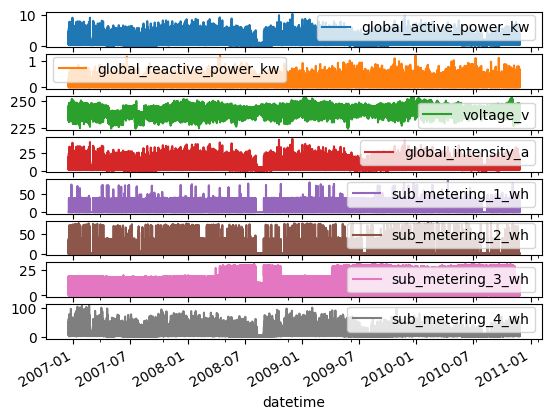

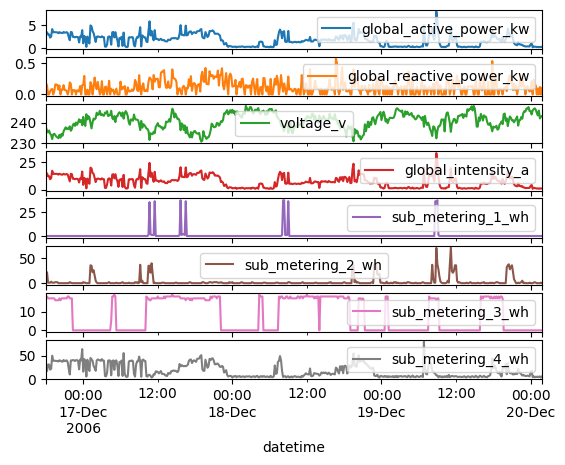

In [19]:
plot_cols = ['global_active_power_kw', 'global_reactive_power_kw', 'voltage_v', 'global_intensity_a', 'sub_metering_1_wh', 'sub_metering_2_wh', 'sub_metering_3_wh', 'sub_metering_4_wh']
plot_features = ten_min_df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = ten_min_df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [20]:
ten_min_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
global_active_power_kw,204925.0,1.090709,1.055575,0.076,0.308,0.602,1.528,10.348
global_reactive_power_kw,204925.0,0.123628,0.112641,0.000,0.048,0.100,0.194,1.186
voltage_v,204925.0,240.840251,3.243356,224.660,238.990,241.000,242.890,253.170
global_intensity_a,204925.0,4.623852,4.436900,0.200,1.400,2.600,6.400,44.600
sub_metering_1_wh,204925.0,1.121859,6.149597,0.000,0.000,0.000,0.000,87.000
sub_metering_2_wh,204925.0,1.296504,5.807708,0.000,0.000,0.000,1.000,79.000
sub_metering_3_wh,204925.0,6.454488,8.438438,0.000,0.000,1.000,17.000,31.000
sub_metering_4_wh,204925.0,9.305511,9.556162,-1.100,3.800,5.500,10.400,109.900


In [21]:
ten_min_df.loc[ten_min_df['sub_metering_4_wh'] < 0] = 0

In [22]:
ten_min_df = ten_min_df.drop(columns=['date', 'time'])

In [23]:
ten_min_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
global_active_power_kw,204925.0,1.090486,1.055656,0.0,0.308,0.6,1.528,10.348
global_reactive_power_kw,204925.0,0.123556,0.112674,0.0,0.048,0.1,0.194,1.186
voltage_v,204925.0,240.707601,6.517952,0.0,238.980,241.0,242.890,253.170
global_intensity_a,204925.0,4.622798,4.437246,0.0,1.400,2.6,6.400,44.600
sub_metering_1_wh,204925.0,1.120683,6.147023,0.0,0.000,0.0,0.000,87.000
sub_metering_2_wh,204925.0,1.295245,5.807088,0.0,0.000,0.0,1.000,79.000
sub_metering_3_wh,204925.0,6.453054,8.438683,0.0,0.000,1.0,17.000,31.000
sub_metering_4_wh,204925.0,9.305654,9.556019,0.0,3.800,5.5,10.400,109.900


In [24]:
ten_min_df.head()

,global_active_power_kw,global_reactive_power_kw,voltage_v,global_intensity_a,sub_metering_1_wh,sub_metering_2_wh,sub_metering_3_wh,sub_metering_4_wh
36,2.790,0.180,237.52,11.8,0.0,0.0,18.0,28.5
46,3.396,0.148,236.20,15.0,0.0,22.0,18.0,16.6
56,2.928,0.000,235.25,12.4,0.0,1.0,17.0,30.8
66,2.930,0.000,236.15,12.4,0.0,1.0,17.0,30.8
76,2.264,0.054,234.67,9.6,0.0,1.0,17.0,19.7


In [25]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

In [26]:
column_indices = {name: i for i, name in enumerate(ten_min_df.columns)}

n = len(ten_min_df)
train_df = ten_min_df[0:int(n*0.7)]
val_df = ten_min_df[int(n*0.7):int(n*0.9)]
test_df = ten_min_df[int(n*0.9):]

num_features = ten_min_df.shape[1]

In [27]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

<ipython-input-28-cc53912566f7>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(ten_min_df.keys(), rotation=90)


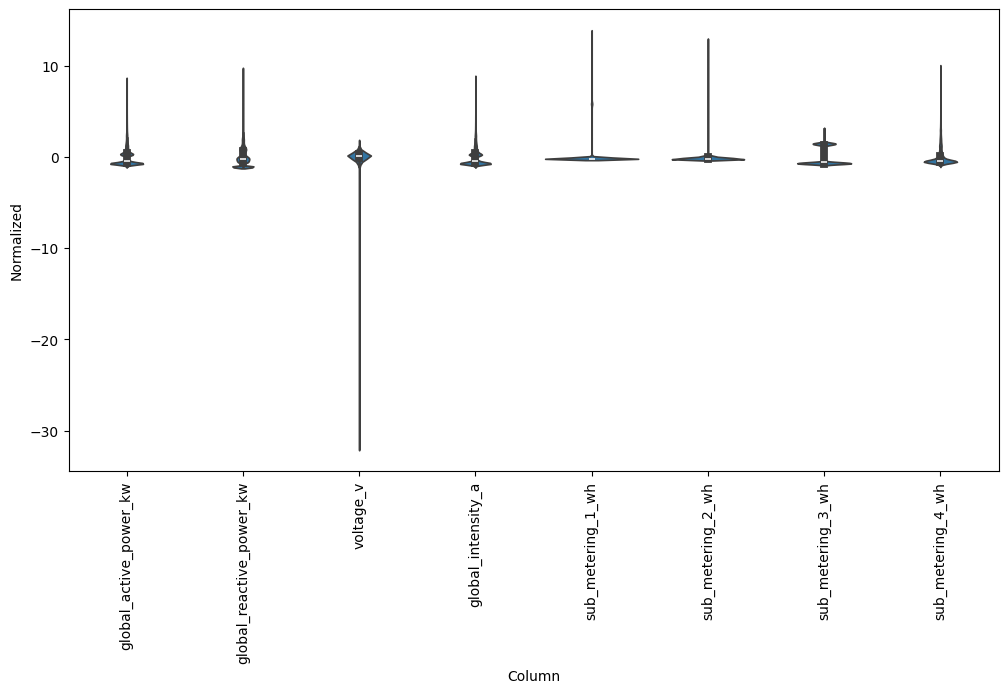

In [28]:
df_std = (ten_min_df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(ten_min_df.keys(), rotation=90)

# Forecasting

## Creating a WindowGenerator class to help predict global active power based on the right subset of time steps

In [29]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='global_active_power_kw', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
      plt.subplot(max_n, 1, n+1)
      plt.ylabel(f'{plot_col} [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [10 min]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)

  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.train))
      # And cache it for next time
      self._example = result
    return result

## Using WindowGenerator class to create windows

In [30]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['global_active_power_kw'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['global_active_power_kw']

In [31]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['global_active_power_kw'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['global_active_power_kw']

In [32]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 8)
Inputs shape: (3, 6, 8)
Labels shape: (3, 1, 1)


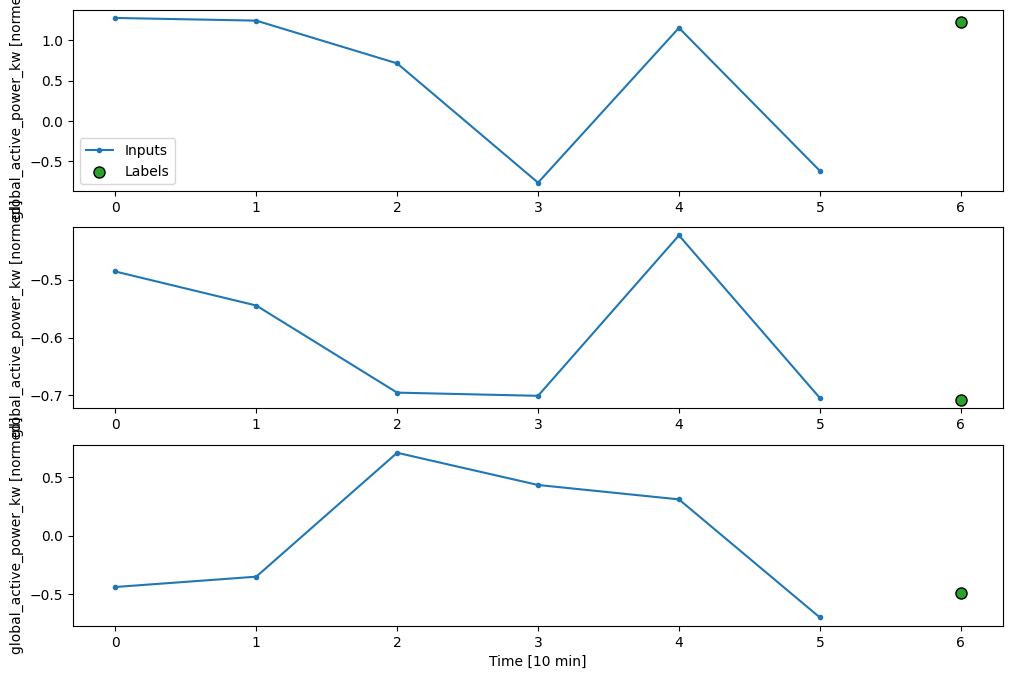

In [33]:
w2.plot()

In [34]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

(TensorSpec(shape=(None, 6, 8), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [35]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 8)
Labels shape (batch, time, features): (32, 1, 1)


In [36]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['global_active_power_kw'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['global_active_power_kw']

In [37]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 8)
Labels shape (batch, time, features): (32, 1, 1)


In [38]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=6,
    label_columns=['global_active_power_kw'])

wide_window

Total window size: 30
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Label column name(s): ['global_active_power_kw']

## Creating a compile and fit function to use our models

In [39]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

## Using the function to train a very simple linear model

In [40]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [41]:
history = compile_and_fit(linear, single_step_window)

val_performance = {}
performance = {}

val_performance['Linear'] = linear.evaluate(single_step_window.val, return_dict=True)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0, return_dict=True)

Epoch 1/20
4483/4483 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - loss: 1.8135 - mean_absolute_error: 0.8084 - val_loss: 0.3195 - val_mean_absolute_error: 0.3060
Epoch 2/20
4483/4483 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 0.3571 - mean_absolute_error: 0.3195 - val_loss: 0.3194 - val_mean_absolute_error: 0.3094
Epoch 3/20
4483/4483 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - loss: 0.3566 - mean_absolute_error: 0.3192 - val_loss: 0.3195 - val_mean_absolute_error: 0.3099
Epoch 4/20
4483/4483 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 0.3569 - mean_absolute_error: 0.3192 - val_loss: 0.3193 - val_mean_absolute_error: 0.3097
Epoch 5/20
4483/4483 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 0.3561 - mean_absolute_error: 0.3190 - val_loss: 0.3193 - val_mean_absolute_error: 0.3103
Epoch 6/20
4483/4483 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 0.3561 - mean_absolute_error: 0.3189 - val_loss: 0.3193 - val_mean_absolute_error: 0.3088
Epoch 7/20
4483/4483 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 0.3567 - mean_absol

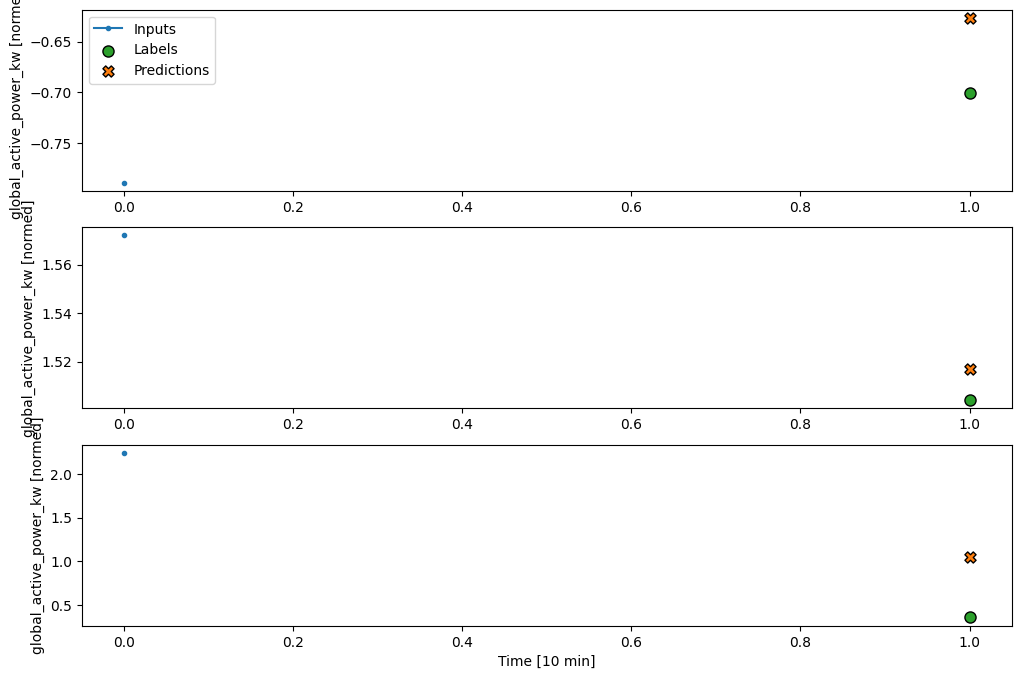

In [42]:
single_step_window.plot(linear)

In [43]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val, return_dict=True)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0, return_dict=True)

Epoch 1/20
4483/4483 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - loss: 0.3588 - mean_absolute_error: 0.3260 - val_loss: 0.2956 - val_mean_absolute_error: 0.2960
Epoch 2/20
4483/4483 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - loss: 0.3341 - mean_absolute_error: 0.3123 - val_loss: 0.2937 - val_mean_absolute_error: 0.3037
Epoch 3/20
4483/4483 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - loss: 0.3298 - mean_absolute_error: 0.3100 - val_loss: 0.2923 - val_mean_absolute_error: 0.2888
Epoch 4/20
4483/4483 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - loss: 0.3278 - mean_absolute_error: 0.3088 - val_loss: 0.2912 - val_mean_absolute_error: 0.2965
Epoch 5/20
4483/4483 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - loss: 0.3267 - mean_absolute_error: 0.3076 - val_loss: 0.2901 - val_mean_absolute_error: 0.2939
Epoch 6/20
4483/4483 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - loss: 0.3260 - mean_absolute_error: 0.3072 - val_loss: 0.2902 - val_mean_absolute_error: 0.2950
Epoch 7/20
4483/4483 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - loss: 0.3251 - mean_absol

In [44]:
CONV_WIDTH = 18
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=6,
    label_columns=['global_active_power_kw'])

conv_window

Total window size: 24
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
Label indices: [23]
Label column name(s): ['global_active_power_kw']

Text(0.5, 0.98, 'Given 3 hours of inputs, predict 1 hour into the future.')

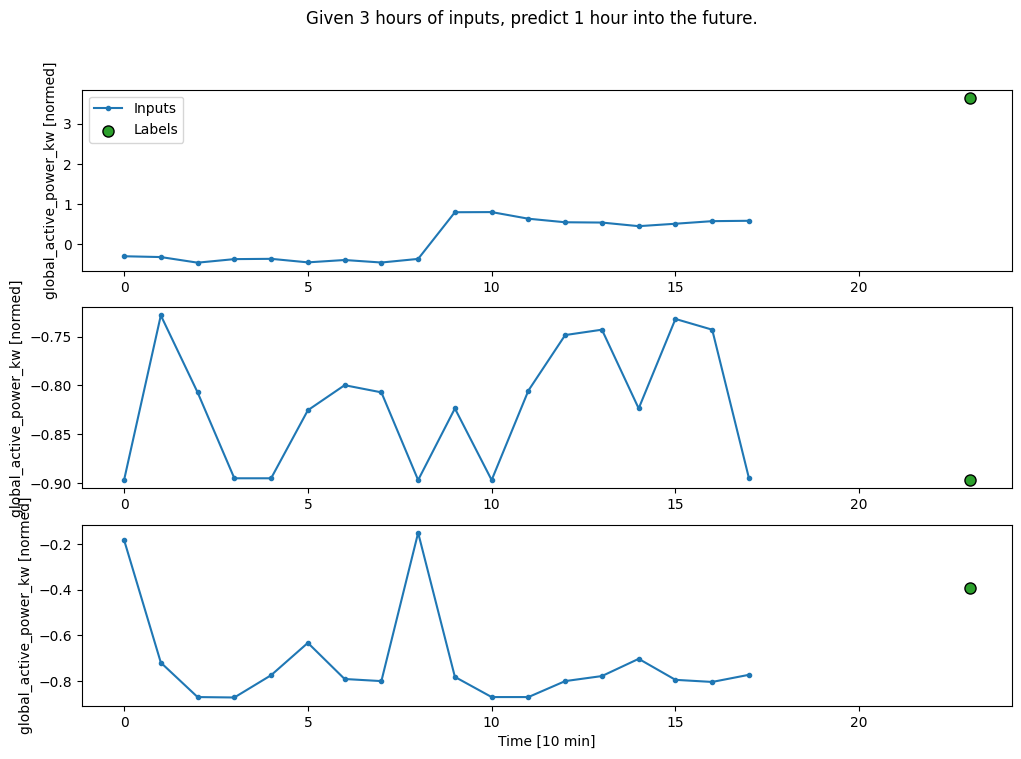

In [45]:
conv_window.plot()
plt.suptitle("Given 3 hours of inputs, predict 1 hour into the future.")

In [46]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])


In [47]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val, return_dict=True)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0, return_dict=True)


1281/1281 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.5791 - mean_absolute_error: 0.5203


In [48]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['global_active_power_kw'])

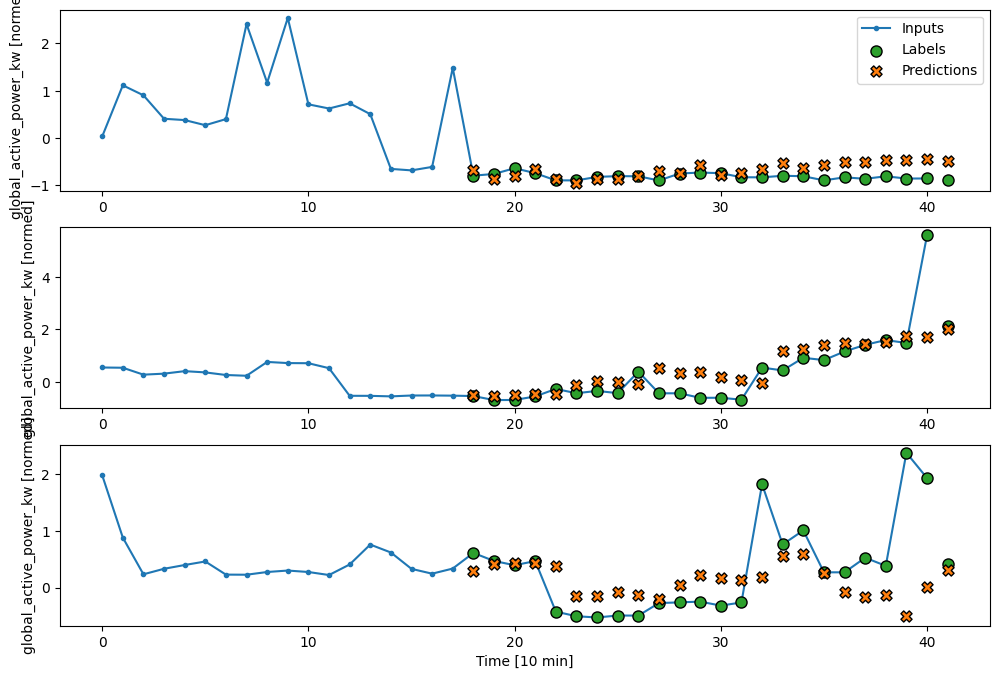

In [49]:
wide_conv_window.plot(conv_model)

In [50]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [51]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val, return_dict=True)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0, return_dict=True)

1280/1280 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.6022 - mean_absolute_error: 0.5373


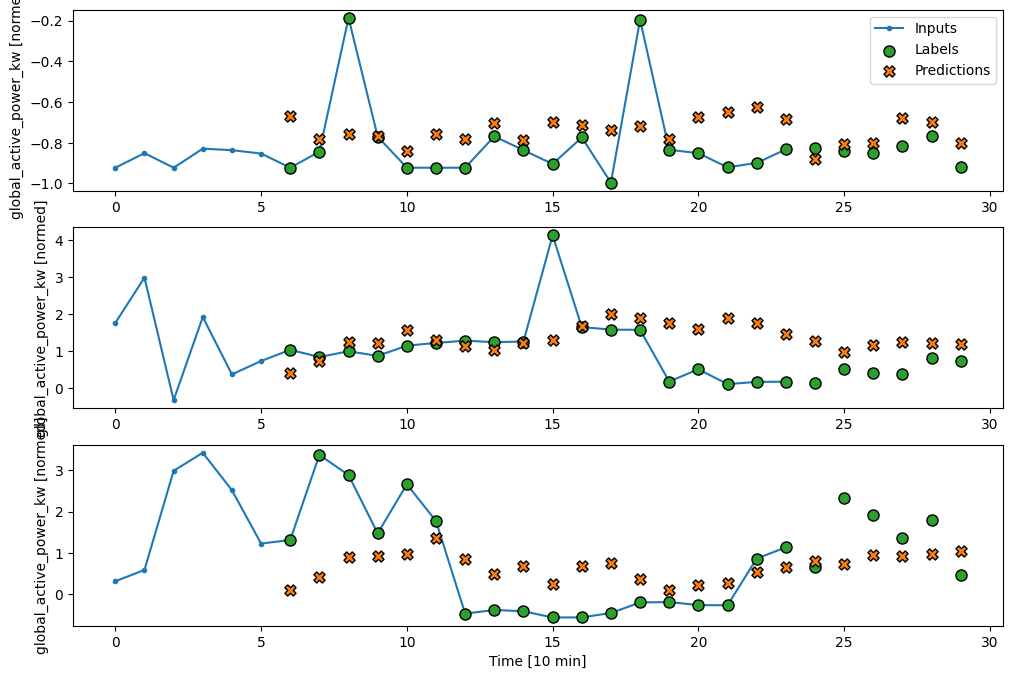

In [52]:
wide_window.plot(lstm_model)

In [53]:
val_performance


{'Linear': {'loss': 0.3191285729408264,
  'mean_absolute_error': 0.3104966878890991},
 'Dense': {'loss': 0.2905001938343048,
  'mean_absolute_error': 0.2955026924610138},
 'Conv': {'loss': 0.5863192081451416,
  'mean_absolute_error': 0.5214361548423767},
 'LSTM': {'loss': 0.5980796813964844,
  'mean_absolute_error': 0.5352298617362976}}

In [54]:
performance

{'Linear': {'loss': 0.24518533051013947,
  'mean_absolute_error': 0.2886708080768585},
 'Dense': {'loss': 0.2159934937953949,
  'mean_absolute_error': 0.2613011598587036},
 'Conv': {'loss': 0.453046053647995,
  'mean_absolute_error': 0.4754253923892975},
 'LSTM': {'loss': 0.4648185074329376,
  'mean_absolute_error': 0.4936404228210449}}

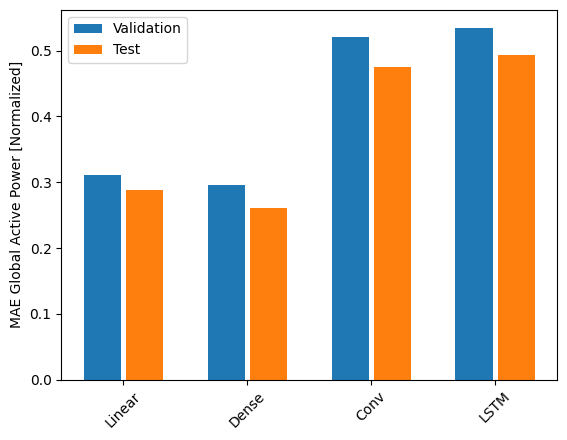

In [55]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
val_mae = [v[metric_name] for v in val_performance.values()]
test_mae = [v[metric_name] for v in performance.values()]

plt.ylabel('MAE Global Active Power [Normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

## Multi-step models

Both the single-output and multiple-output models in the previous sections made **single time step predictions**, one hour into the future.

This section looks at how to expand these models to make **multiple time step predictions**.

In a multi-step prediction, the model needs to learn to predict a range of future values. Thus, unlike a single step model, where only a single future point is predicted, a multi-step model predicts a sequence of the future values.

There are two rough approaches to this:

1. Single shot predictions where the entire time series is predicted at once.
2. Autoregressive predictions where the model only makes single step predictions and its output is fed back as its input.

In this section all the models will predict **all the features across all output time steps**.


For the multi-step model, the training data again consists of hourly samples. However, here, the models will learn to predict 24 hours into the future, given 24 hours of the past.

Here is a `Window` object that generates these slices from the dataset:

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

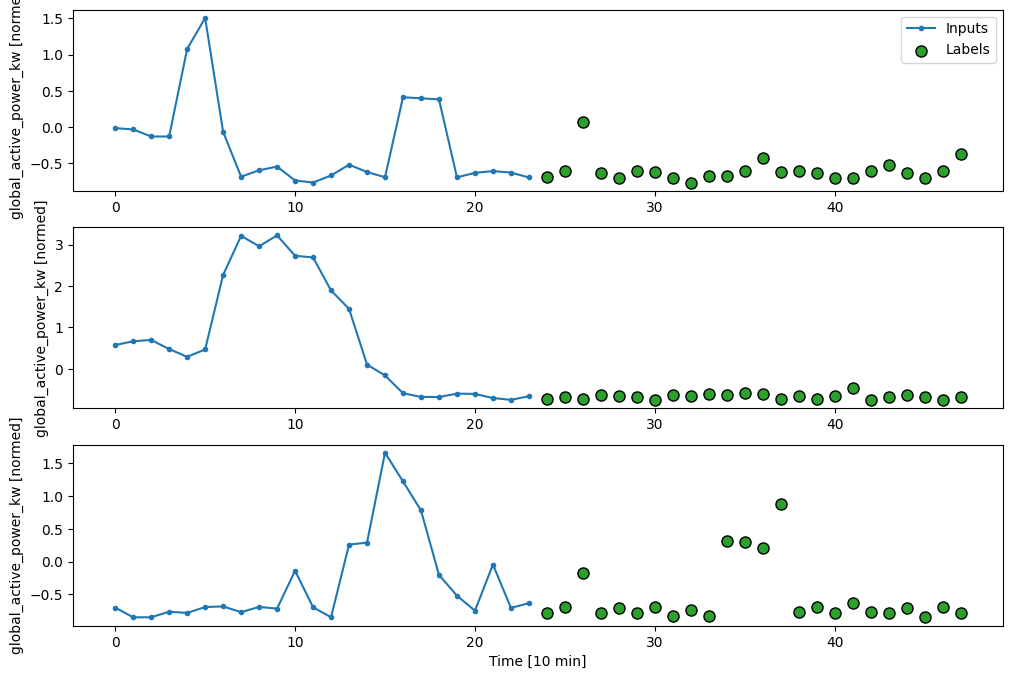

In [56]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

### Single-shot models

One high-level approach to this problem is to use a "single-shot" model, where the model makes the entire sequence prediction in a single step.

This can be implemented efficiently as a `tf.keras.layers.Dense` with `OUT_STEPS*features` output units. The model just needs to reshape that output to the required `(OUTPUT_STEPS, features)`.

#### Linear

A simple linear model based on the last input time step does better than either baseline, but is underpowered. The model needs to predict `OUTPUT_STEPS` time steps, from a single input time step with a linear projection. It can only capture a low-dimensional slice of the behavior, likely based mainly on the time of day and time of year.

![Predict all timesteps from the last time-step](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/structured_data/images/multistep_dense.png?raw=1)

1280/1280 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7572 - mean_absolute_error: 0.5470


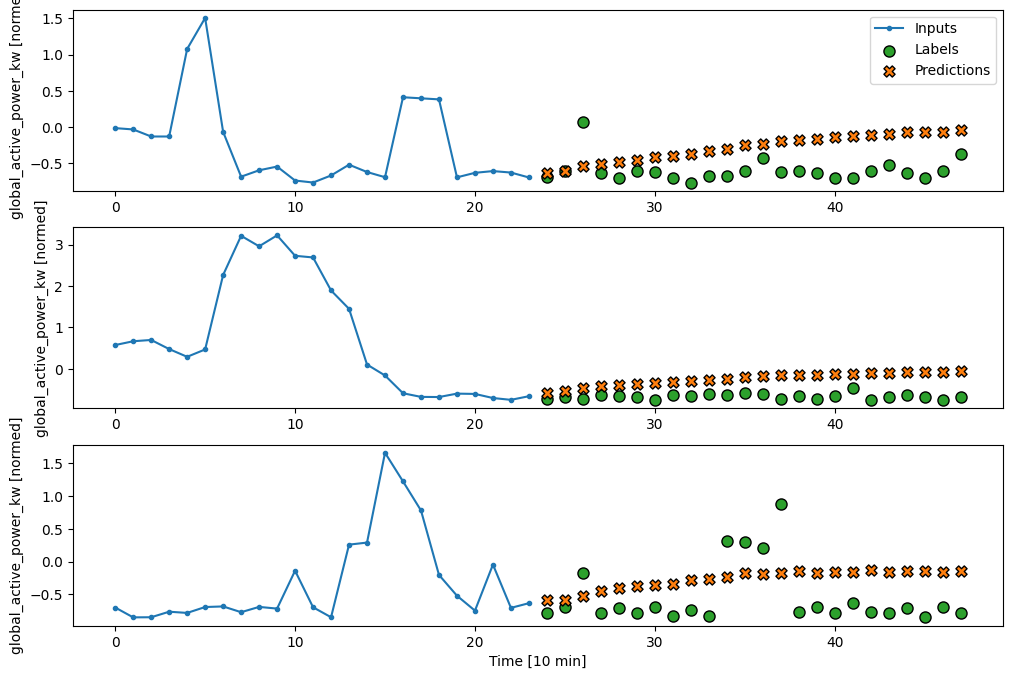

In [57]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val, return_dict=True)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(multi_linear_model)

#### Dense

Adding a `tf.keras.layers.Dense` between the input and output gives the linear model more power, but is still only based on a single input time step.

1280/1280 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7480 - mean_absolute_error: 0.5345


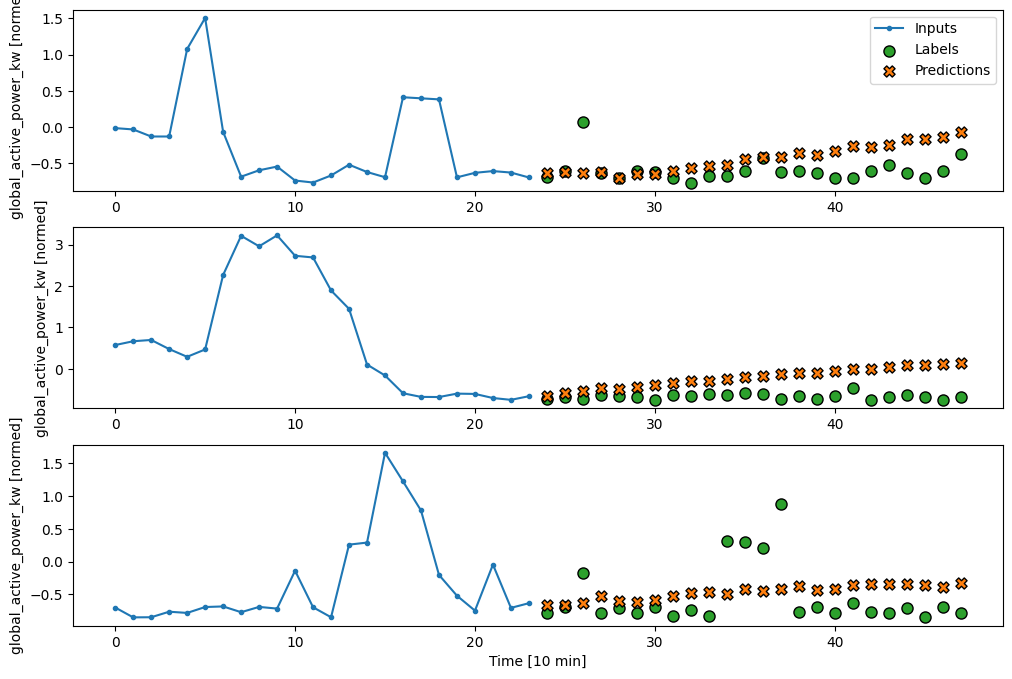

In [58]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val, return_dict=True)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(multi_dense_model)

#### CNN

A convolutional model makes predictions based on a fixed-width history, which may lead to better performance than the dense model since it can see how things are changing over time:

![A convolutional model sees how things change over time](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/structured_data/images/multistep_conv.png?raw=1)

1280/1280 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.7274 - mean_absolute_error: 0.5306


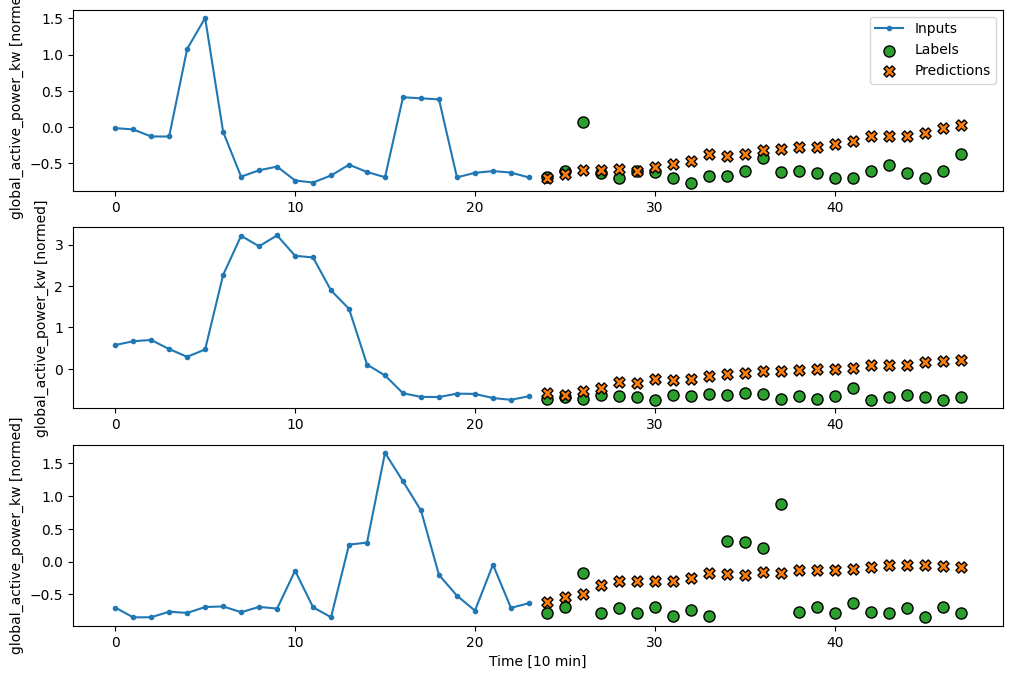

In [59]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val, return_dict=True)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(multi_conv_model)

#### RNN

A recurrent model can learn to use a long history of inputs, if it's relevant to the predictions the model is making. Here the model will accumulate internal state for 24 hours, before making a single prediction for the next 24 hours.

In this single-shot format, the LSTM only needs to produce an output at the last time step, so set `return_sequences=False` in `tf.keras.layers.LSTM`.

![The LSTM accumulates state over the input window, and makes a single prediction for the next 24 hours](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/structured_data/images/multistep_lstm.png?raw=1)


1280/1280 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.7045 - mean_absolute_error: 0.5059


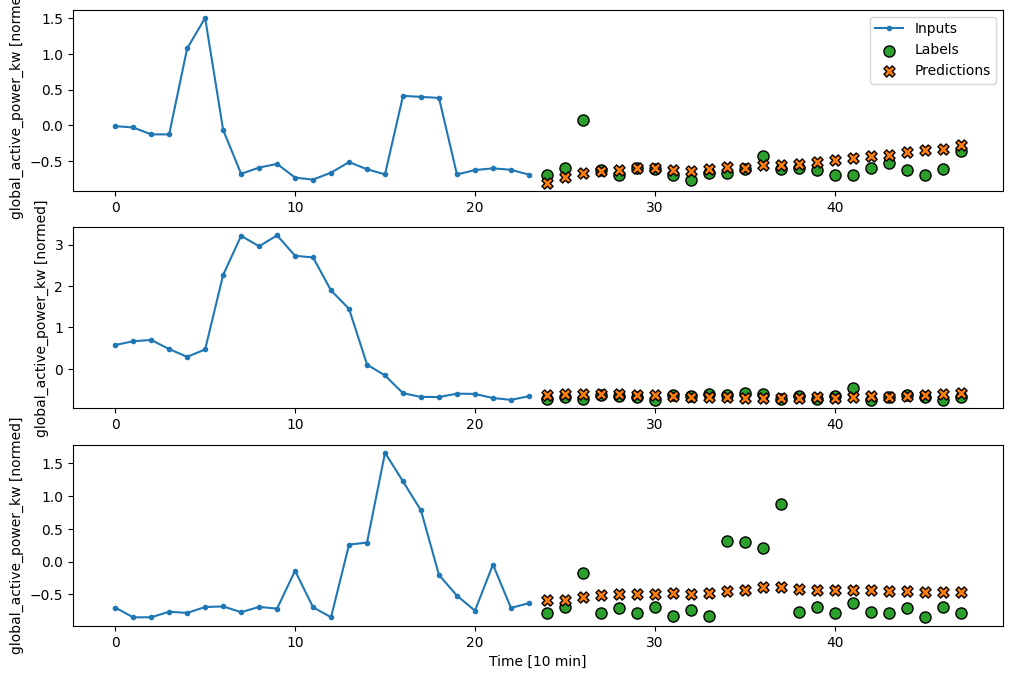

In [60]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val, return_dict=True)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(multi_lstm_model)

### Advanced: Autoregressive model

The above models all predict the entire output sequence in a single step.

In some cases it may be helpful for the model to decompose this prediction into individual time steps. Then, each model's output can be fed back into itself at each step and predictions can be made conditioned on the previous one, like in the classic <a href="https://arxiv.org/abs/1308.0850" class="external">Generating Sequences With Recurrent Neural Networks</a>.

One clear advantage to this style of model is that it can be set up to produce output with a varying length.

You could take any of the single-step multi-output models trained in the first half of this tutorial and run in an autoregressive feedback loop, but here you'll focus on building a model that's been explicitly trained to do that.

![Feedback a model's output to its input](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/structured_data/images/multistep_autoregressive.png?raw=1)

#### RNN

This tutorial only builds an autoregressive RNN model, but this pattern could be applied to any model that was designed to output a single time step.

The model will have the same basic form as the single-step LSTM models from earlier: a `tf.keras.layers.LSTM` layer followed by a `tf.keras.layers.Dense` layer that converts the `LSTM` layer's outputs to model predictions.

A `tf.keras.layers.LSTM` is a `tf.keras.layers.LSTMCell` wrapped in the higher level `tf.keras.layers.RNN` that manages the state and sequence results for you (Check out the [Recurrent Neural Networks (RNN) with Keras](https://www.tensorflow.org/guide/keras/rnn) guide for details).

In this case, the model has to manually manage the inputs for each step, so it uses `tf.keras.layers.LSTMCell` directly for the lower level, single time step interface.

In [61]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [62]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

The first method this model needs is a `warmup` method to initialize its internal state based on the inputs. Once trained, this state will capture the relevant parts of the input history. This is equivalent to the single-step `LSTM` model from earlier:

In [63]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

This method returns a single time-step prediction and the internal state of the `LSTM`:

In [64]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 8])

With the `RNN`'s state, and an initial prediction you can now continue iterating the model feeding the predictions at each step back as the input.

The simplest approach for collecting the output predictions is to use a Python list and a `tf.stack` after the loop.

Note: Stacking a Python list like this only works with eager-execution, using `Model.compile(..., run_eagerly=True)` for training, or with a fixed length output. For a dynamic output length, you would need to use a `tf.TensorArray` instead of a Python list, and `tf.range` instead of the Python `range`.

In [65]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the LSTM state.
  prediction, state = self.warmup(inputs)

  # Insert the first prediction.
  predictions.append(prediction)

  # Run the rest of the prediction steps.
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output.
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

Test run this model on the example inputs:

In [66]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 24, 8)


Now, train the model:

1280/1280 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.7214 - mean_absolute_error: 0.5119


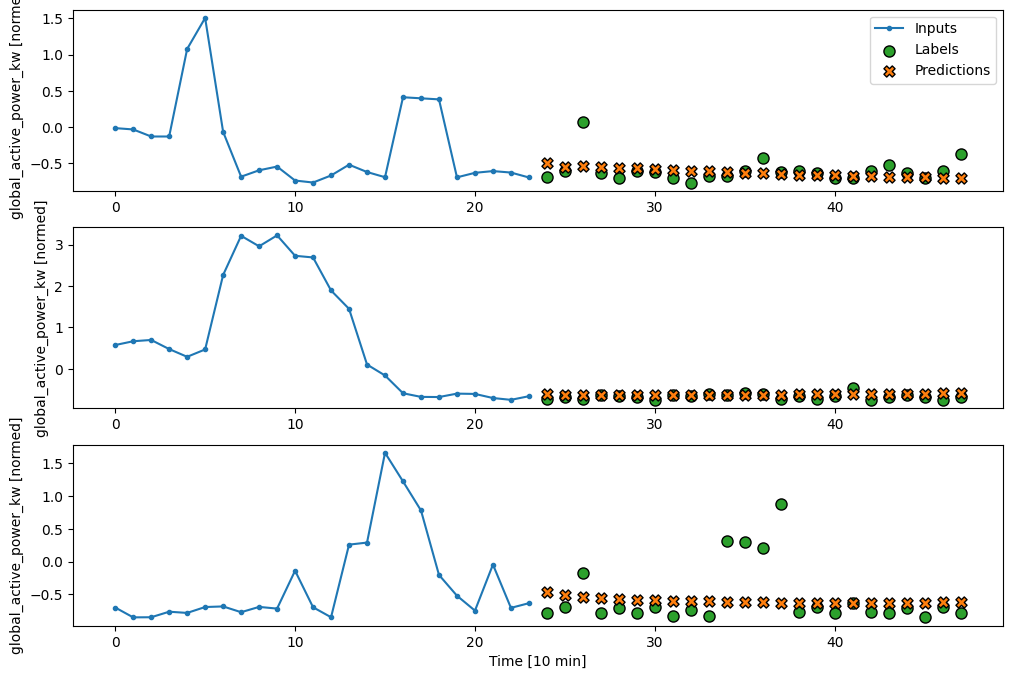

In [67]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val, return_dict=True)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(feedback_model)

### Performance

There are clearly diminishing returns as a function of model complexity on this problem:

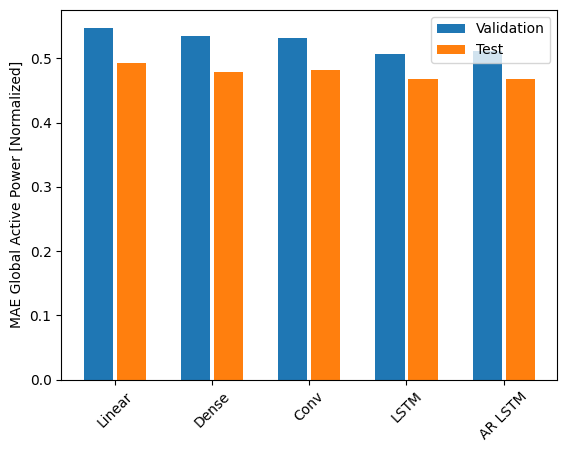

In [68]:
x = np.arange(len(multi_performance))
width = 0.3

metric_name = 'mean_absolute_error'
val_mae = [v[metric_name] for v in multi_val_performance.values()]
test_mae = [v[metric_name] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE Global Active Power [Normalized]')
_ = plt.legend()

The metrics for the multi-output models in the first half of this tutorial show the performance averaged across all output features. These performances are similar but also averaged across output time steps.

In [70]:
for name, value in multi_performance.items():
  print(f'{name:8s}: {value[metric_name]:0.4f}')

Linear  : 0.4935
Dense   : 0.4785
Conv    : 0.4818
LSTM    : 0.4684
AR LSTM : 0.4675


In [71]:
for name, value in multi_val_performance.items():
  print(f'{name:8s}: {value[metric_name]:0.4f}')

Linear  : 0.5478
Dense   : 0.5345
Conv    : 0.5313
LSTM    : 0.5064
AR LSTM : 0.5114


The gains achieved going from a dense model to convolutional and recurrent models are only a few percent (if any), and the autoregressive model performed clearly worse. So these more complex approaches may not be worth while on **this** problem, but there was no way to know without trying, and these models could be helpful for **your** problem.